In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_cydl = pd.read_csv('data/CYDL.csv',index_col='date',parse_dates=True,usecols=['date','close'],na_values=['nan'])

In [39]:
print (df_cydl.iloc[:10])

            close
date             
2014-10-20  3.921
2014-10-21  3.940
2014-10-22  3.916
2014-10-23  3.818
2014-10-24  3.852
2014-10-27  3.867
2014-10-28  3.989
2014-10-29  4.171
2014-10-30  4.328
2014-10-31  4.618


In [8]:
df_jfjs = pd.read_csv('data/JFJS.csv',index_col='date',parse_dates=True,usecols=['date','close'],na_values=['nan'])

In [9]:
df_sjg = pd.read_csv('data/SJG.csv',index_col='date',parse_dates=True,usecols=['date','close'],na_values=['nan'])

In [11]:
df_xtyy = pd.read_csv('data/XTYY.csv',index_col='date',parse_dates=True,usecols=['date','close'],na_values=['nan'])

In [12]:
dates = pd.date_range('2017-01-01','2017-06-05')
df_close = pd.DataFrame(index=dates)       #zero df

In [20]:
def get_stock_data(names,dfclose):
    for name in names:
        df_temp = pd.read_csv('data/'+name+'.csv',index_col='date',parse_dates=True,usecols=['date','close'],
                             na_values=['nan'])
        df_temp = df_temp.rename(columns={'close':name})     # rename clos name
        dfclose = dfclose.join(df_temp,how='inner')
    return dfclose

In [22]:
stock_names = ['CYDL','JFJS','SJG']
dfclose = get_stock_data(stock_names, df_close)


In [28]:
dfclose.loc['2017-02-08',:]        # 几种不同的切片操作

CYDL     5.830
JFJS     9.143
SJG     11.230
Name: 2017-02-08 00:00:00, dtype: float64

In [30]:
dfclose.iloc[0,:]

CYDL     5.830
JFJS     9.143
SJG     11.230
Name: 2017-02-08 00:00:00, dtype: float64

In [31]:
dfclose.ix[0,:]

CYDL     5.830
JFJS     9.143
SJG     11.230
Name: 2017-02-08 00:00:00, dtype: float64

In [35]:
print dfclose.iloc[:10,:]    # df.dropna(subset='xxx') 除去缺失值

            CYDL    JFJS    SJG
2017-02-08  5.83   9.143  11.23
2017-02-09  5.90   9.241  12.35
2017-02-10  5.91   9.333  13.59
2017-02-13  5.92   9.377  14.95
2017-02-14  5.95   9.725  16.45
2017-02-15  6.00  10.389  18.10
2017-02-16  6.02  10.307  19.91
2017-02-17  5.96  10.361  21.90
2017-02-20  6.03  10.383  24.09
2017-02-21  6.04  10.748  26.50


In [37]:
def plot_cruve(df,normalization_flag=False):
    if normalization_flag:
        df = df/df.ix[0,:]
    ax = df.plot(title='stock price',fontsize=12)
    ax.set_xlabel('date')
    ax.set_ylabel('price')
    plt.show()

    

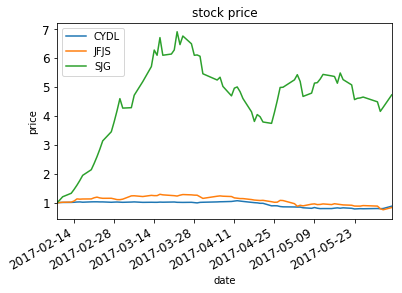

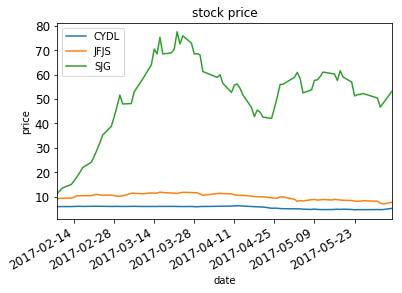

In [38]:
plot_cruve(dfclose,normalization_flag=True)
plot_cruve(dfclose)